**Vamos experimentar agora o algoritmo Decision Tree?**

In [1]:
!pip -q install yellowbrick
!pip install --upgrade sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [3]:
import pickle
with open('/content/sample_data/RestauranteAtual.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [4]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)



> **Vamos testar o modelo?**



In [5]:
previsoes = modelo.predict(X_teste)

In [6]:
previsoes

array(['Sim', 'Nao', 'Nao'], dtype=object)



> **Será se o modelo acertou?**



In [7]:
y_teste

array(['Nao', 'Sim', 'Nao'], dtype=object)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.3333333333333333

In [9]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 1],
       [1, 0]])

0.3333333333333333

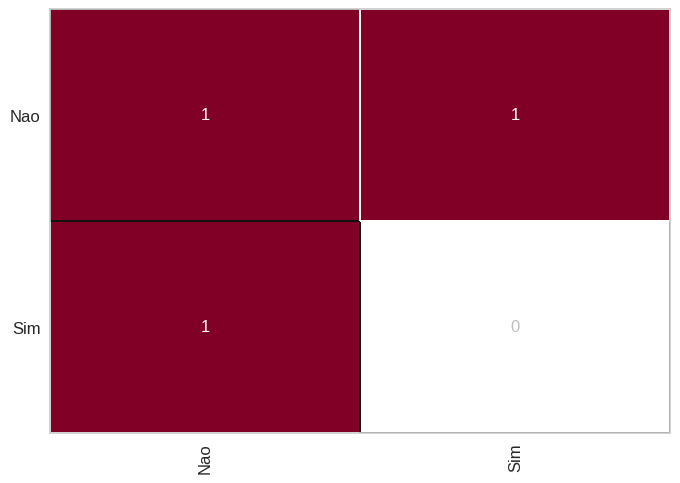

In [10]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [11]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.50      0.50      0.50         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



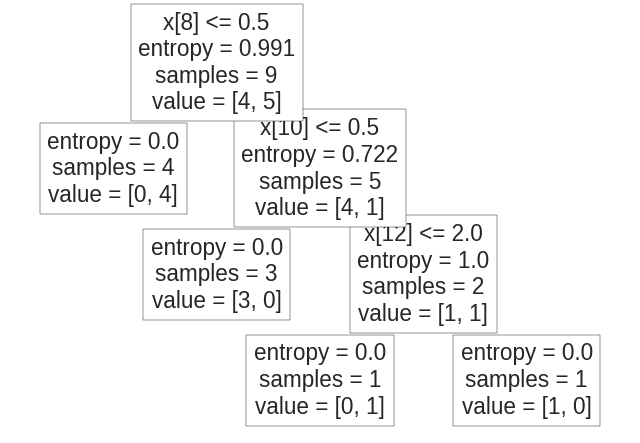

In [12]:
from sklearn import tree
plt.show(tree.plot_tree(Y))

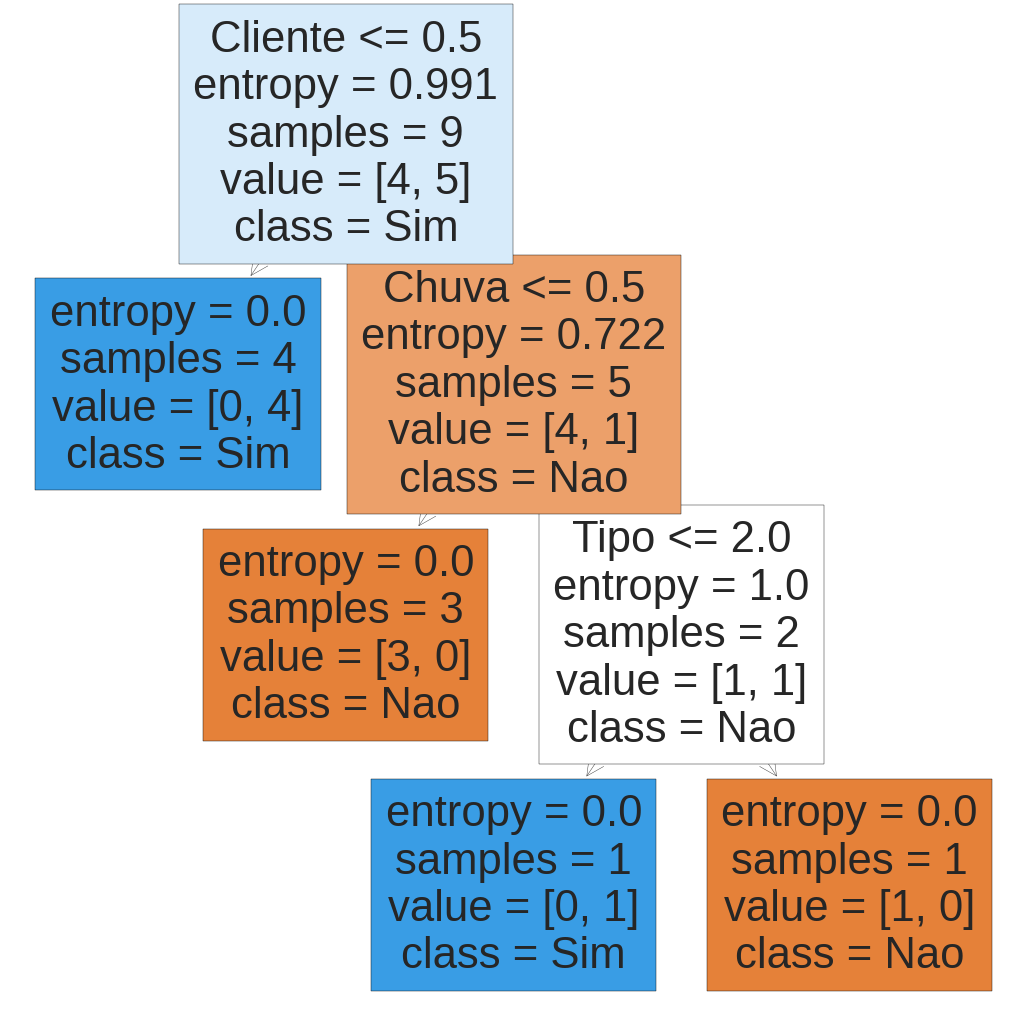

In [13]:
from sklearn import tree
previsores = ['Frances', 'Hamburguer', 'Italiano', 'Tailandes', 'Alternativo', 'Bar', 'SextaSabado', 'Fome', 'Cliente', 'Preco','Chuva','Res','Tipo', 'Tempo']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);